# Visualizations for Publication

Publication-quality visualizations following APA 7th edition guidelines.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

# Set style for publication
sns.set_style('whitegrid')
sns.set_context('paper', font_scale=1.2)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Use colorblind-friendly palette
colors = sns.color_palette('colorblind')
warnings.filterwarnings('ignore')

## Load Data

In [2]:
# Load girls survey data
girls_df = pd.read_csv('../../1_data_collection/data/cleaned/girls_survey_clean.csv')
print(f"Girls sample: n={len(girls_df)}")

# Load community survey data
community_df = pd.read_csv('../../1_data_collection/data/cleaned/community_survey_clean.csv')
print(f"Community sample: n={len(community_df)}")

Girls sample: n=102
Community sample: n=168


## Figure 1: Sample Characteristics

Demographic composition of study participants.

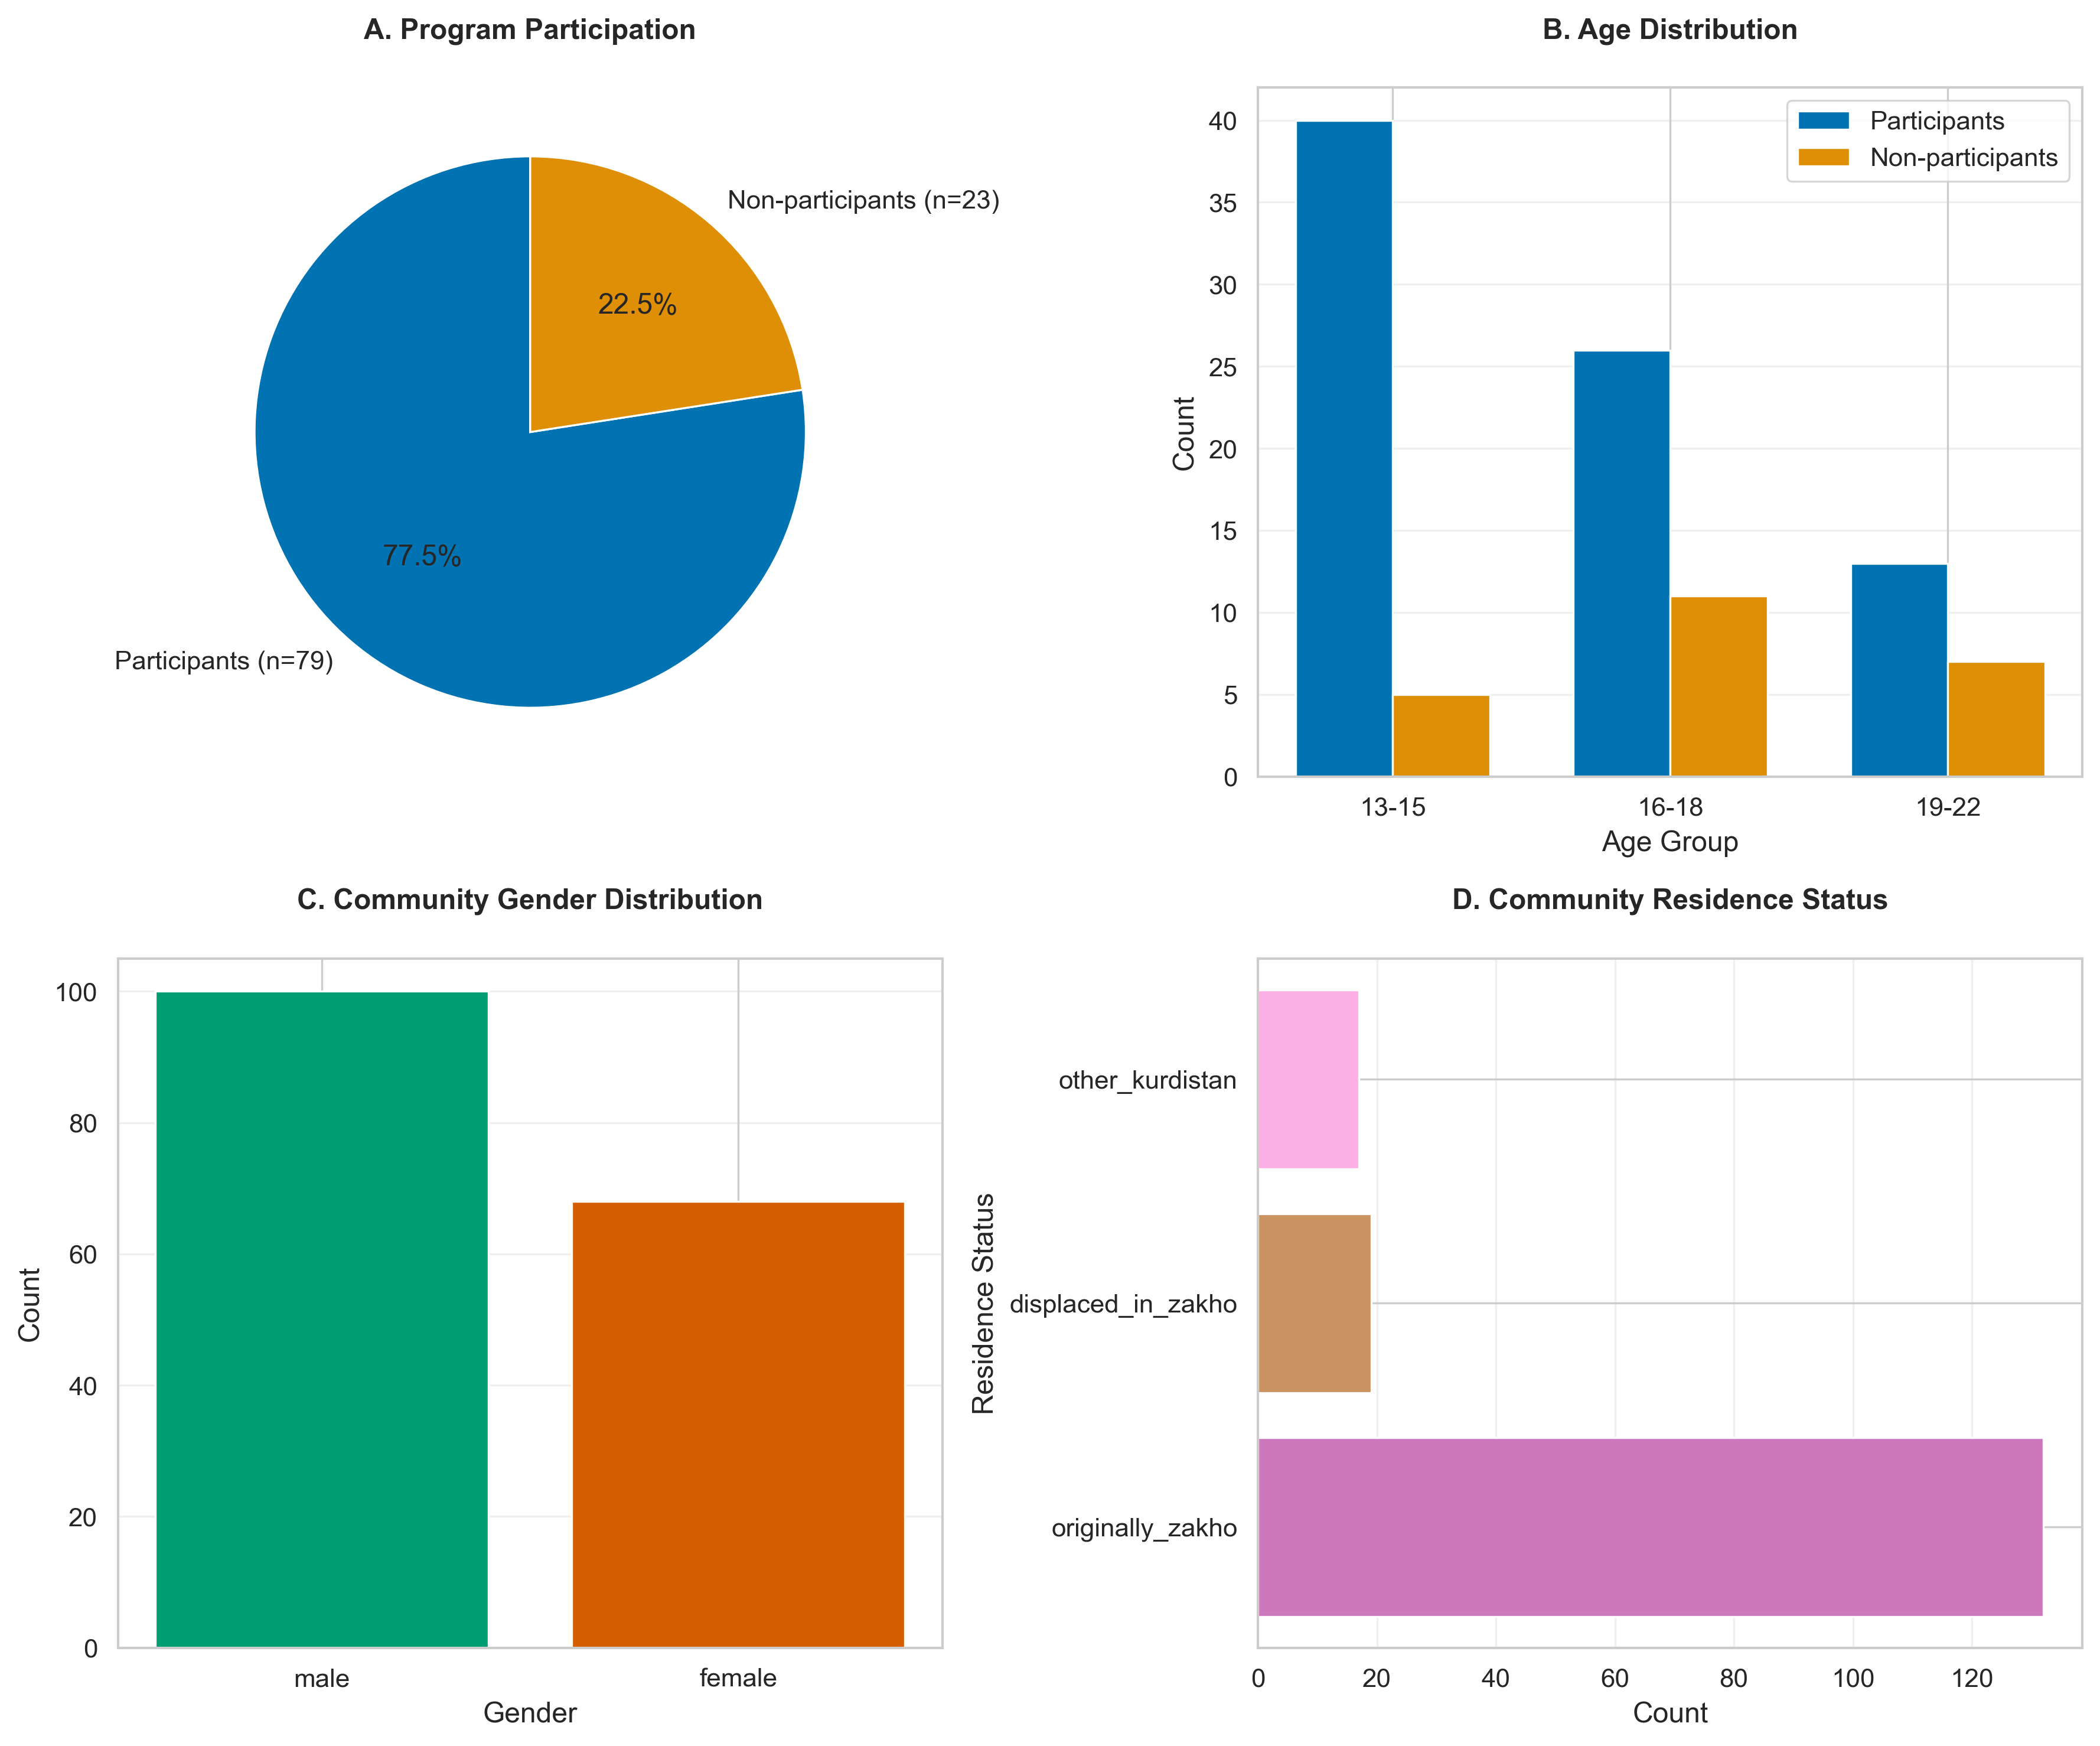

Figure 1 saved: figures/figure1_sample_characteristics.png


In [3]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Girls: Program participation
ax1 = axes[0, 0]
participation = girls_df['in_program'].value_counts()
colors_part = [colors[0], colors[1]]
ax1.pie(participation.values, labels=['Participants (n=79)', 'Non-participants (n=23)'], 
        autopct='%1.1f%%', startangle=90, colors=colors_part)
ax1.set_title('A. Program Participation', fontweight='bold', pad=20)

# Girls: Age distribution
ax2 = axes[0, 1]
age_data = girls_df.groupby(['in_program', 'age_group']).size().unstack(fill_value=0)
x = np.arange(len(age_data.columns))
width = 0.35
ax2.bar(x - width/2, age_data.loc['yes'], width, label='Participants', color=colors[0])
ax2.bar(x + width/2, age_data.loc['no'], width, label='Non-participants', color=colors[1])
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Count')
ax2.set_title('B. Age Distribution', fontweight='bold', pad=20)
ax2.set_xticks(x)
ax2.set_xticklabels(age_data.columns)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# Community: Gender distribution
ax3 = axes[1, 0]
gender_counts = community_df['gender'].value_counts()
ax3.bar(gender_counts.index, gender_counts.values, color=colors[2:4])
ax3.set_xlabel('Gender')
ax3.set_ylabel('Count')
ax3.set_title('C. Community Gender Distribution', fontweight='bold', pad=20)
ax3.grid(axis='y', alpha=0.3)

# Community: Residence status
ax4 = axes[1, 1]
residence_counts = community_df['residence_status'].value_counts()
ax4.barh(residence_counts.index, residence_counts.values, color=colors[4:7])
ax4.set_xlabel('Count')
ax4.set_ylabel('Residence Status')
ax4.set_title('D. Community Residence Status', fontweight='bold', pad=20)
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/figure1_sample_characteristics.png', bbox_inches='tight', dpi=300)
plt.show()

print("Figure 1 saved: figures/figure1_sample_characteristics.png")

## Figure 2: Group Comparisons on Wellbeing Outcomes

Participants vs non-participants across WHO-5, social support, and confidence indices.

In [ ]:
outcome_vars = ['who5_score', 'social_index', 'confidence_index']
outcome_labels = ['WHO-5 Wellbeing\nScore', 'Social Support\nIndex', 'Self-Confidence\nIndex']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, (var, label) in enumerate(zip(outcome_vars, outcome_labels)):
    ax = axes[idx]
    
    # Get data
    participants = girls_df[girls_df['in_program']=='yes'][var].dropna()
    non_participants = girls_df[girls_df['in_program']=='no'][var].dropna()
    
    # Box plots
    bp = ax.boxplot([participants, non_participants],
                     positions=[1, 2],
                     widths=0.6,
                     patch_artist=True,
                     showmeans=True,
                     meanprops=dict(marker='D', markerfacecolor='red', markersize=6))
    
    # Color the boxes
    for patch, color in zip(bp['boxes'], [colors[0], colors[1]]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    # Add individual points with jitter
    for i, data in enumerate([participants, non_participants], 1):
        y = data.values
        x = np.random.normal(i, 0.04, len(y))
        ax.scatter(x, y, alpha=0.3, s=30, color=colors[i-1])
    
    # Statistics
    t_stat, p_val = stats.mannwhitneyu(participants, non_participants, alternative='two-sided')
    
    # Add mean values
    mean_part = participants.mean()
    mean_non = non_participants.mean()
    ax.text(1, ax.get_ylim()[0] + 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
            f'M={mean_part:.1f}', ha='center', fontsize=9, fontweight='bold')
    ax.text(2, ax.get_ylim()[0] + 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
            f'M={mean_non:.1f}', ha='center', fontsize=9, fontweight='bold')
    
    # Add significance indicator
    if p_val < 0.001:
        sig_text = '***'
    elif p_val < 0.01:
        sig_text = '**'
    elif p_val < 0.05:
        sig_text = '*'
    else:
        sig_text = 'ns'
    
    y_max = max(participants.max(), non_participants.max())
    y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
    ax.plot([1, 2], [y_max + 0.15*y_range, y_max + 0.15*y_range], 'k-', lw=1.5)
    ax.text(1.5, y_max + 0.17*y_range, sig_text, ha='center', fontsize=12, fontweight='bold')
    
    # Labels
    ax.set_xticks([1, 2])
    ax.set_xticklabels(['Participants\\n(n=79)', 'Non-participants\\n(n=23)'])
    ax.set_ylabel('Score')
    ax.set_title(label, fontweight='bold', pad=15)
    ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/figure2_group_comparisons.png', bbox_inches='tight', dpi=300)
plt.show()

print(\"Figure 2 saved: figures/figure2_group_comparisons.png\")
print(\"Note: *** p<0.001, ** p<0.01, * p<0.05, ns = not significant\")

## Figure 3: Effect Sizes with Confidence Intervals

Forest plot showing Cohen's d effect sizes for group differences.

In [ ]:
def cohens_d(group1, group2):
    """Calculate Cohen's d effect size"""
    n1, n2 = len(group1), len(group2)
    var1, var2 = np.var(group1, ddof=1), np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
    return (np.mean(group1) - np.mean(group2)) / pooled_std

def cohens_d_ci(group1, group2, confidence=0.95):
    """Calculate CI for Cohen's d"""
    from scipy.stats import t as t_dist
    n1, n2 = len(group1), len(group2)
    d = cohens_d(group1, group2)
    
    var_d = (n1 + n2) / (n1 * n2) + d**2 / (2 * (n1 + n2))
    se_d = np.sqrt(var_d)
    
    alpha = 1 - confidence
    df = n1 + n2 - 2
    t_crit = t_dist.ppf(1 - alpha/2, df)
    
    return d - t_crit * se_d, d + t_crit * se_d

# Calculate effect sizes
effect_sizes = []
ci_lowers = []
ci_uppers = []
labels = []

for var, label in zip(outcome_vars, ['WHO-5 Score', 'Social Support Index', 'Self-Confidence Index']):
    participants = girls_df[girls_df['in_program']=='yes'][var].dropna()
    non_participants = girls_df[girls_df['in_program']=='no'][var].dropna()
    
    d = cohens_d(participants, non_participants)
    ci_lower, ci_upper = cohens_d_ci(participants, non_participants)
    
    effect_sizes.append(d)
    ci_lowers.append(ci_lower)
    ci_uppers.append(ci_upper)
    labels.append(label)

# Create forest plot
fig, ax = plt.subplots(figsize=(10, 6))

y_pos = np.arange(len(labels))
errors = np.array([[es - ci_l for es, ci_l in zip(effect_sizes, ci_lowers)],
                   [ci_u - es for es, ci_u in zip(effect_sizes, ci_uppers)]])

# Plot points and error bars
ax.errorbar(effect_sizes, y_pos, xerr=errors, fmt='o', markersize=10, 
            capsize=5, capthick=2, elinewidth=2, color=colors[0])

# Add vertical line at 0 (no effect)
ax.axvline(x=0, color='gray', linestyle='--', linewidth=1, alpha=0.7)

# Add shaded regions for effect size interpretation
ax.axvspan(-0.2, 0.2, alpha=0.1, color='gray', label='Small effect')
ax.axvspan(0.5, 1.5, alpha=0.1, color='orange', label='Medium-Large effect')

# Labels and formatting
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.set_xlabel(\"Cohen's d (95% CI)\", fontweight='bold', fontsize=12)
ax.set_title(\"Effect Sizes: Participants vs Non-participants\", fontweight='bold', fontsize=14, pad=20)
ax.grid(axis='x', alpha=0.3)

# Add effect size values as text
for i, (es, ci_l, ci_u) in enumerate(zip(effect_sizes, ci_lowers, ci_uppers)):
    ax.text(max(effect_sizes) + 0.5, i, f'{es:.2f} [{ci_l:.2f}, {ci_u:.2f}]',
            va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../figures/figure3_effect_sizes.png', bbox_inches='tight', dpi=300)
plt.show()

print(\"Figure 3 saved: figures/figure3_effect_sizes.png\")
print(\"\\nEffect size interpretation:\")
print(\"  Small: d = 0.2, Medium: d = 0.5, Large: d = 0.8\")